# Import Packages

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import geopandas as gpd
# import geoplot as gplt
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


# repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import the datasets from pickle files
demographics_problems_merged = pd.read_pickle('../data/clean_presented_problems.pkl')
demographics_aggression_problems = pd.read_pickle('../data/demographics_aggression_problems.pkl')

In [3]:
# create a function to make a custom bar plot
def make_custom_bar_plot(df, bar_x, bar_y, fill_by, x_label, y_label, title, file_name):
    plot1 = (ggplot(df, aes(x = bar_x, y = bar_y, fill= fill_by))
            + geom_col()
            + coord_flip()
            + labs(x = x_label, y = y_label, title = title)
            + theme_light()
            + theme(legend_position='none'))

    ggsave(plot=plot1, filename = file_name, path = '../output/figures/', dpi  = 500)

    return plot1


/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../output/figures/presenting_problems_count.png


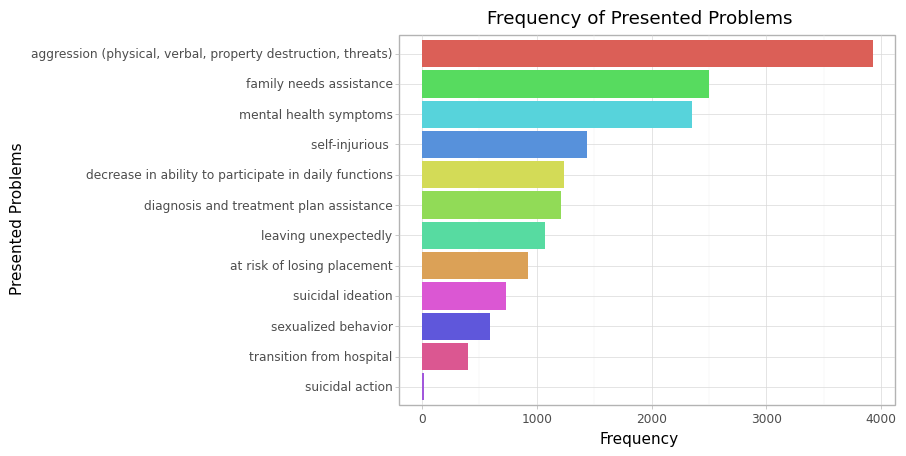

<ggplot: (8774636185338)>

In [4]:
presenting_problems_count_df = pd.DataFrame(demographics_problems_merged.presented_problems.value_counts()).reset_index().rename(
    columns={'index' : 'problem', 'presented_problems' : 'frequency'})
make_custom_bar_plot(df = presenting_problems_count_df, bar_x = 'reorder(problem, frequency)', bar_y = 'frequency', fill_by ='problem', 
                     x_label = 'Presented Problems', y_label = 'Frequency', title='Frequency of Presented Problems', file_name = 'presenting_problems_count.png')

In [5]:
# create a function to make a custom bar plot
def make_custom_bar_plot(df, bar_x, bar_y, fill_by, x_label, y_label, title, file_name):
    plot1 = (ggplot(df, aes(x = bar_x, y = bar_y, fill= fill_by))
            + geom_col()
            + coord_flip()
            + labs(x = x_label, y = y_label, title = title)
            + theme_light()
            + theme(legend_position='none'))

    ggsave(plot=plot1, filename = file_name, path = '../output/figures/', dpi  = 500)

    return plot1


/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../output/figures/presenting_problems_count.png


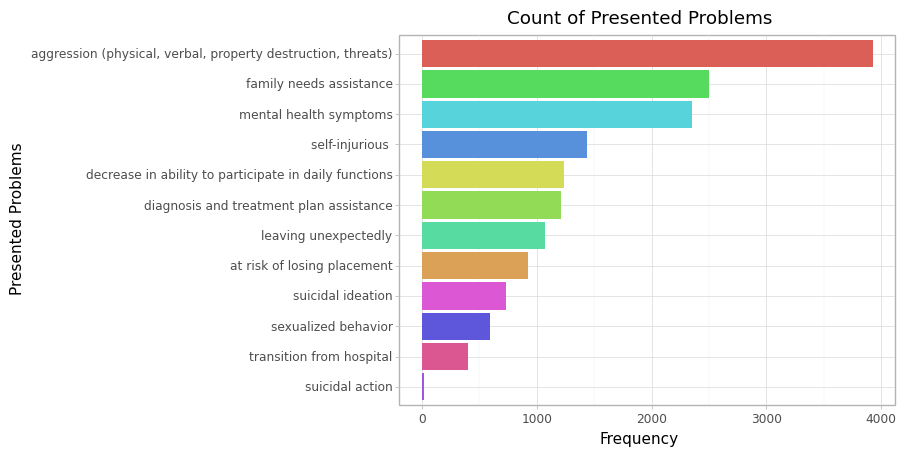

<ggplot: (8774610826490)>

In [6]:
# bar plot of count of presented problems
presenting_problems_count_df = pd.DataFrame(demographics_problems_merged.presented_problems.value_counts()).reset_index().rename(
    columns={'index' : 'problem', 'presented_problems' : 'frequency'})
make_custom_bar_plot(df = presenting_problems_count_df, bar_x = 'reorder(problem, frequency)', bar_y = 'frequency', fill_by ='problem', 
                     x_label = 'Presented Problems', y_label = 'Frequency', title='Count of Presented Problems', file_name = 'presenting_problems_count.png')

/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/esmer1/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../output/figures/presenting_problems_count.png


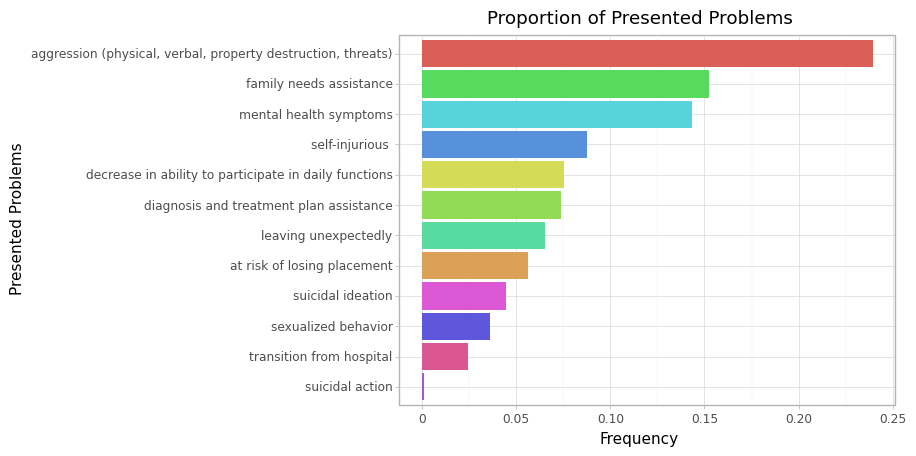

<ggplot: (8774655907871)>

In [7]:
# bar plot of porportion of presented problems
presenting_problems_count_df = pd.DataFrame(demographics_problems_merged.presented_problems.value_counts(normalize=True)).reset_index().rename(
    columns={'index' : 'problem', 'presented_problems' : 'frequency'})
make_custom_bar_plot(df = presenting_problems_count_df, bar_x = 'reorder(problem, frequency)', bar_y = 'frequency', fill_by ='problem', 
                     x_label = 'Presented Problems', y_label = 'Frequency', title='Proportion of Presented Problems', file_name = 'presenting_problems_count.png')

In [8]:
demographics_problems_merged.presented_problems.value_counts(normalize=True)

aggression (physical, verbal, property destruction, threats)    0.239471
family needs assistance                                         0.152252
mental health symptoms                                          0.143353
self-injurious                                                  0.087646
decrease in ability to participate in daily functions           0.075456
diagnosis and treatment plan assistance                         0.074054
leaving unexpectedly                                            0.065460
at risk of losing placement                                     0.056256
suicidal ideation                                               0.044554
sexualized behavior                                             0.036265
transition from hospital                                        0.024441
suicidal action                                                 0.000792
Name: presented_problems, dtype: float64

In [9]:
# define a dictionary of colors for each disability level
colors = {'Normal intelligence': '#1f77b4', 'Borderline': '#ff7f0e', 'Mild': '#228B22', 'Moderate': '#CC79A7', 'Severe': '#8B4513', 'Profound': '#DC143C'}

# line plot of the total number of people for each disability level over time (by month-year)
plot_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())

plot_by_ym.set_xlabel("Enrollment Year")
plot_by_ym.set_ylabel("Count")
plot_by_ym.legend(title="Disability Level", labels=colors.keys())
plot_by_ym.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)")
plot_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

In [10]:
# line plot of the total number of people for each aggression level by year
plot_by_y = demographics_aggression_problems.groupby('enrollment_year')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())
plot_by_y.set_xlabel("Enrollment Year")
plot_by_y.set_ylabel("Count")
plot_by_y.legend(title="Disability Level")
plot_by_y.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Year)")
plot_by_y


Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

In [11]:
# line plot of the total number of people for each aggression level by year
gender_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['Gender'].value_counts(normalize=True).unstack().fillna(0).plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Month-Year)")
gender_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

In [12]:
gender_by_ym = demographics_aggression_problems.groupby('enrollment_year')['Gender'].value_counts(normalize=True).unstack().plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Year)")
gender_by_ym



Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

In [13]:
demographics_aggression_problems.groupby('enrollment_year')['Ethnicity'].value_counts(normalize=True).unstack().fillna(0).plot(figsize=(12, 8))

<AxesSubplot:xlabel='enrollment_year'>

In [14]:
# Disability level by gender
disability_by_gender = demographics_aggression_problems.groupby("Gender")['disability_level_ordered'].value_counts(normalize = True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_gender.set_ylabel("Proportion")
disability_by_gender.legend(title="Disbility Level")
disability_by_gender.set_title("Proportion of Disability Level by Gender")
disability_by_gender

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender'}, xlabel='Gender', ylabel='Proportion'>

In [15]:
temp = demographics_aggression_problems[demographics_aggression_problems.enrollment_year > 2018]
disability_after_2018 = temp.groupby(['enrollment_year', 'Gender'])['disability_level_ordered'].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_after_2018.set_xlabel("Enrollment Year, Gender")
disability_after_2018.set_ylabel("Proportion")
disability_after_2018.legend(title="Disbility Level")
disability_after_2018.set_title("Proportion of Disability Level by Gender for 2019 and 2020")
disability_after_2018

Text(0.5, 0, 'Enrollment Year, Gender')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender for 2019 and 2020')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender for 2019 and 2020'}, xlabel='Enrollment Year, Gender', ylabel='Proportion'>

In [16]:
disability_by_state = demographics_aggression_problems.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state.set_xlabel("State")
disability_by_state.set_ylabel("Proportion")
disability_by_state.legend(title="Disbility Level")
disability_by_state.set_title("Proportion of Disability Levels by State for People with Aggression Problems")
disability_by_state

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People with Aggression Problems')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People with Aggression Problems'}, xlabel='State', ylabel='Proportion'>

In [17]:
## the demographics merged dataset before subsetting to aggression problems
disability_by_state_full_dataset = demographics_problems_merged.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state_full_dataset.set_xlabel("State")
disability_by_state_full_dataset.set_ylabel("Proportion")
disability_by_state_full_dataset.legend(title="Disbility Level")
disability_by_state_full_dataset.set_title("Proportion of Disability Levels by State for People for the Entire Dataset")
disability_by_state_full_dataset

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People for the Entire Dataset')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People for the Entire Dataset'}, xlabel='State', ylabel='Proportion'>

In [18]:
# subset to people with mild disability level that have agression issues
mild_aggression_problems = demographics_aggression_problems[demographics_aggression_problems['disability_level'] == 'Mild'].copy()

In [19]:
# create dataframe with count of people with mild disability level that have agression issues
aggression_mild_df = pd.DataFrame(mild_aggression_problems.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
aggression_mild_df 

,enrollment_year,Local ID
0,2010,5
1,2011,17
2,2012,10
3,2013,22
4,2014,89
5,2015,61
6,2016,122
7,2017,235
8,2018,367
9,2019,444


In [20]:
# subset to people with mild disability level from general dataframe
mild_df = demographics_problems_merged[demographics_problems_merged['disability_level'] == 'Mild'].copy()
mild_df.head()

,Local ID,state_demographics,enrollment_date,enrollment_ym_derived,enrollment_year,disability_level,disability_level_ordered,presented_problems,Gender,Ethnicity,County
0,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,"aggression (physical, verbal, property destruc...",Female,Not of Hispanic origin,Swain
1,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,decrease in ability to participate in daily fu...,Female,Not of Hispanic origin,Swain
2,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,leaving unexpectedly,Female,Not of Hispanic origin,Swain
3,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,mental health symptoms,Female,Not of Hispanic origin,Swain
4,1021487,texas,2020-03-02,2020-03-01,2020,Mild,Mild,"aggression (physical, verbal, property destruc...",Male,Not of Hispanic origin,Tarrant


In [21]:
# create dataframe with count of people with mild disability level
gen_mild_df = pd.DataFrame(mild_df.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
gen_mild_df 

,enrollment_year,Local ID
0,2010,24
1,2011,93
2,2012,50
3,2013,122
4,2014,338
5,2015,238
6,2016,512
7,2017,983
8,2018,1561
9,2019,1997


In [22]:
# merge both dattaframes with counts
mild_merged_df =  aggression_mild_df.merge(gen_mild_df, left_on='enrollment_year', right_on='enrollment_year',
                                                                  how='inner', suffixes=('_agression', '_general'), 
                                                                  indicator = True).drop_duplicates()
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge
0,2010,5,24,both
1,2011,17,93,both
2,2012,10,50,both
3,2013,22,122,both
4,2014,89,338,both
5,2015,61,238,both
6,2016,122,512,both
7,2017,235,983,both
8,2018,367,1561,both
9,2019,444,1997,both


In [23]:
# create new variable in merged df for percent of people with mild disability level that have agression issues
mild_merged_df["mild_perc"] = mild_merged_df['Local ID_agression'] / mild_merged_df['Local ID_general']
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge,mild_perc
0,2010,5,24,both,0.208333
1,2011,17,93,both,0.182796
2,2012,10,50,both,0.200000
3,2013,22,122,both,0.180328
4,2014,89,338,both,0.263314
5,2015,61,238,both,0.256303
6,2016,122,512,both,0.238281
7,2017,235,983,both,0.239064
8,2018,367,1561,both,0.235106
9,2019,444,1997,both,0.222334


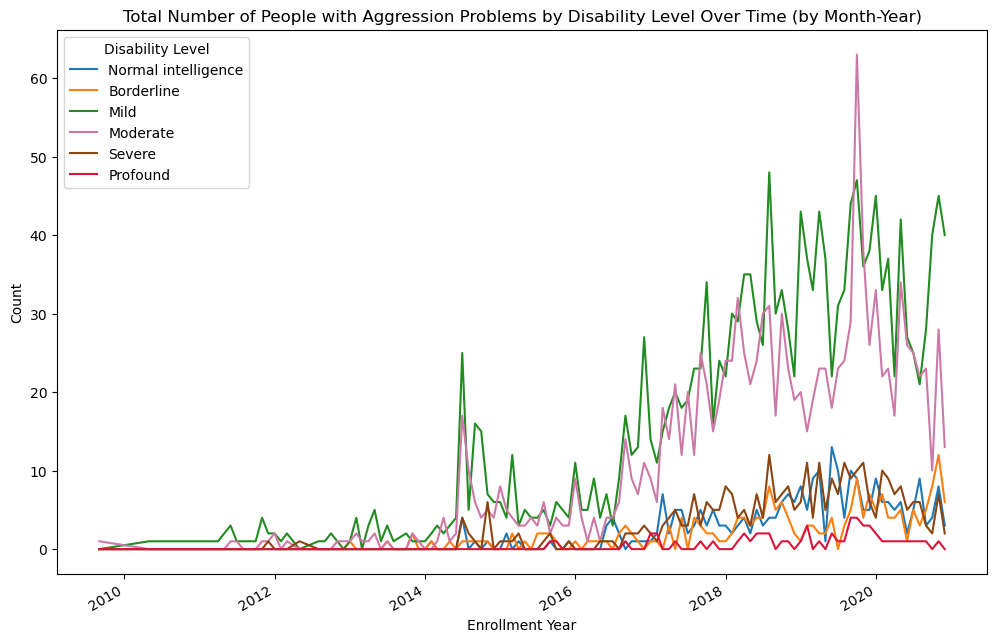

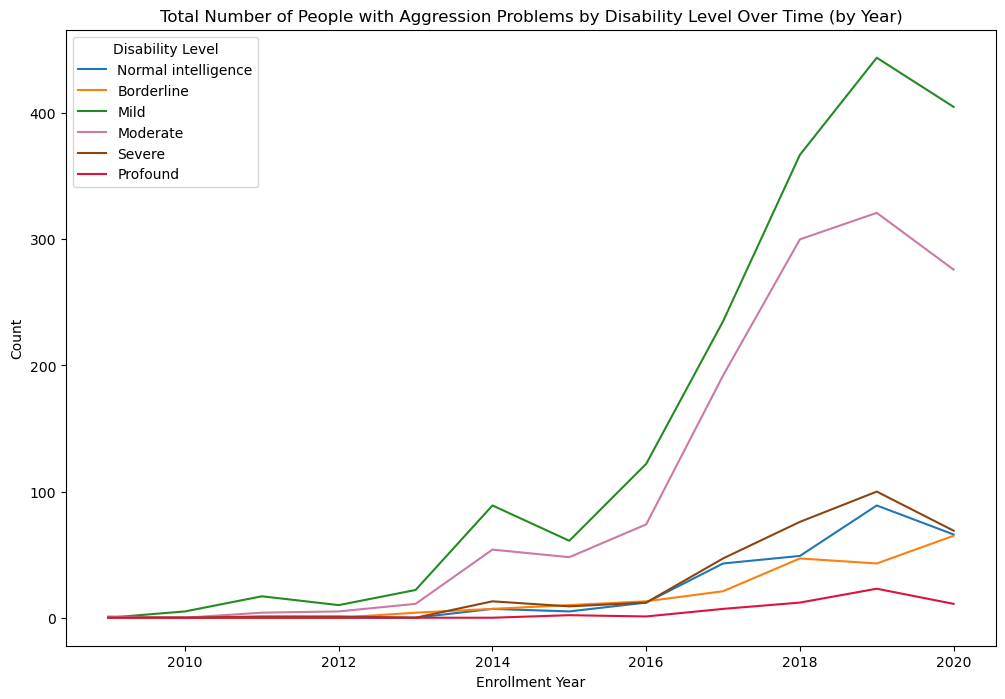

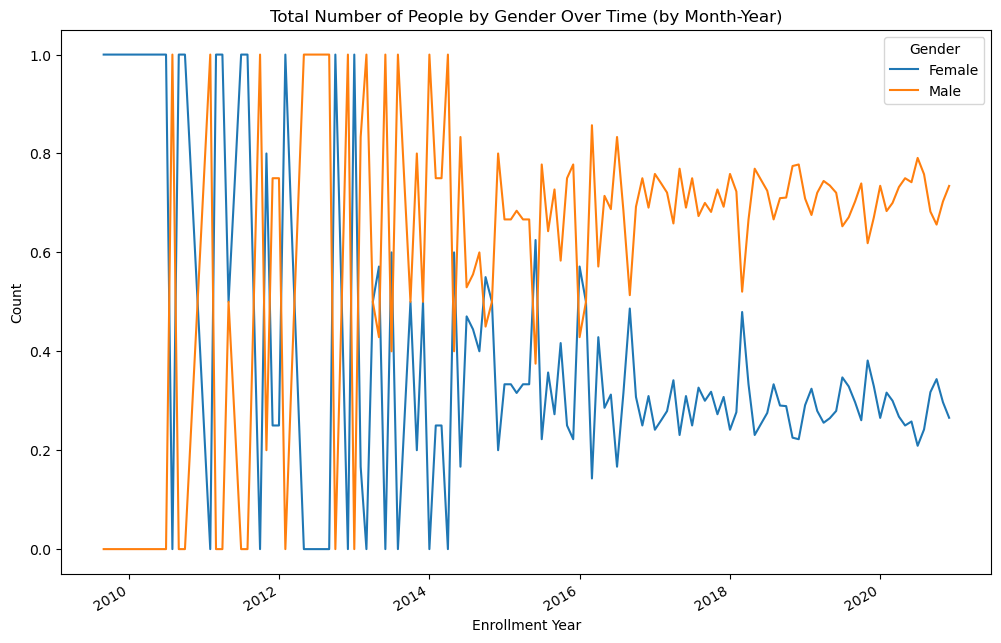

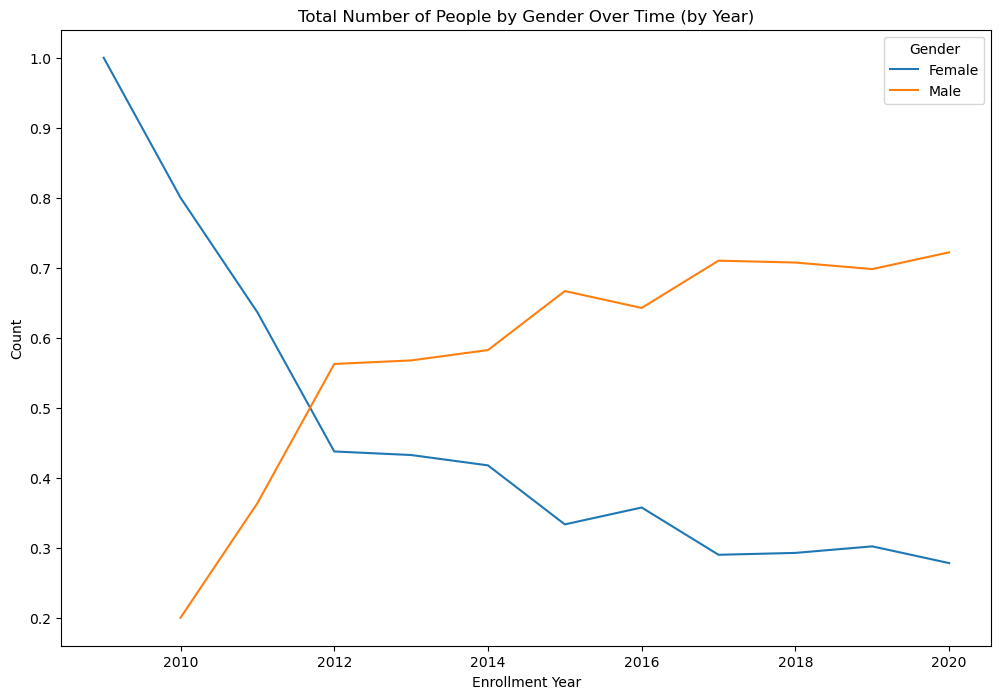

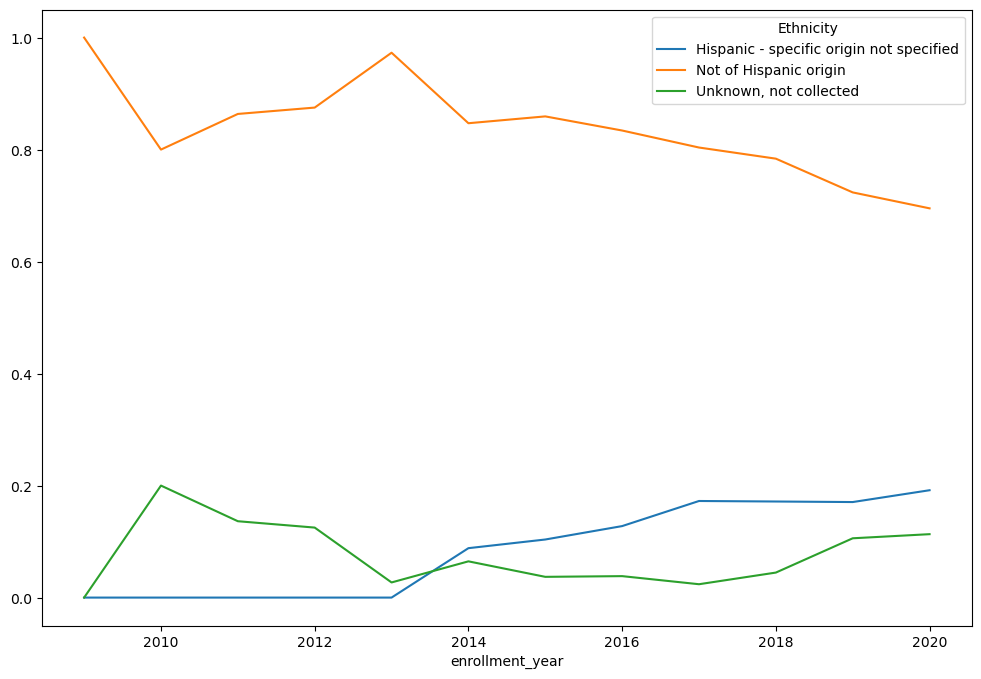

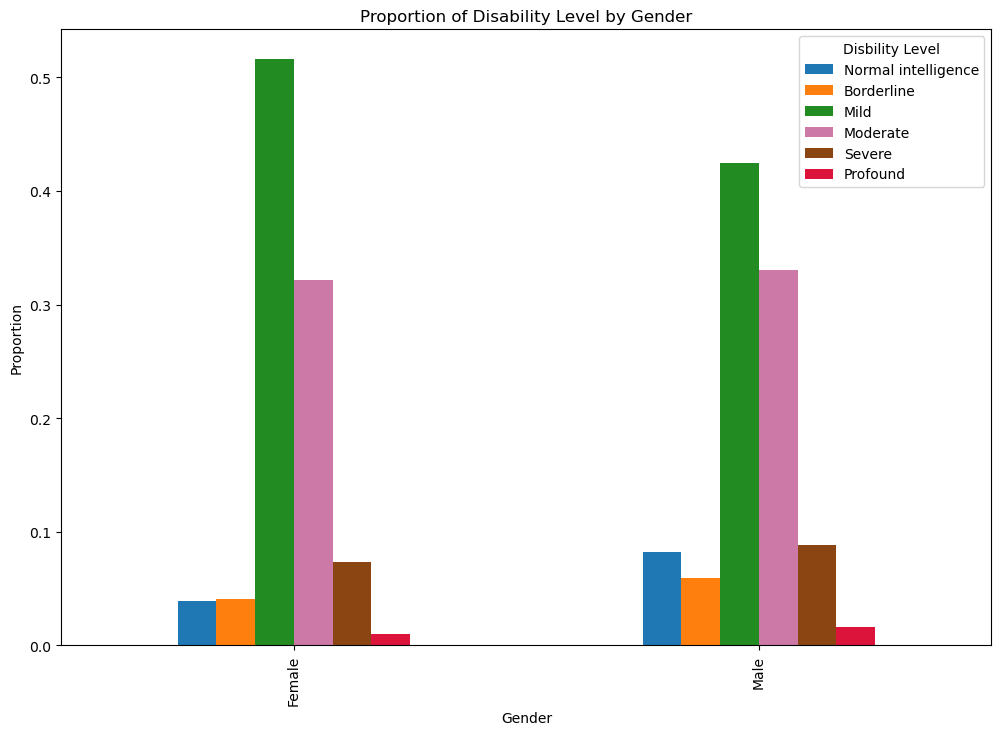

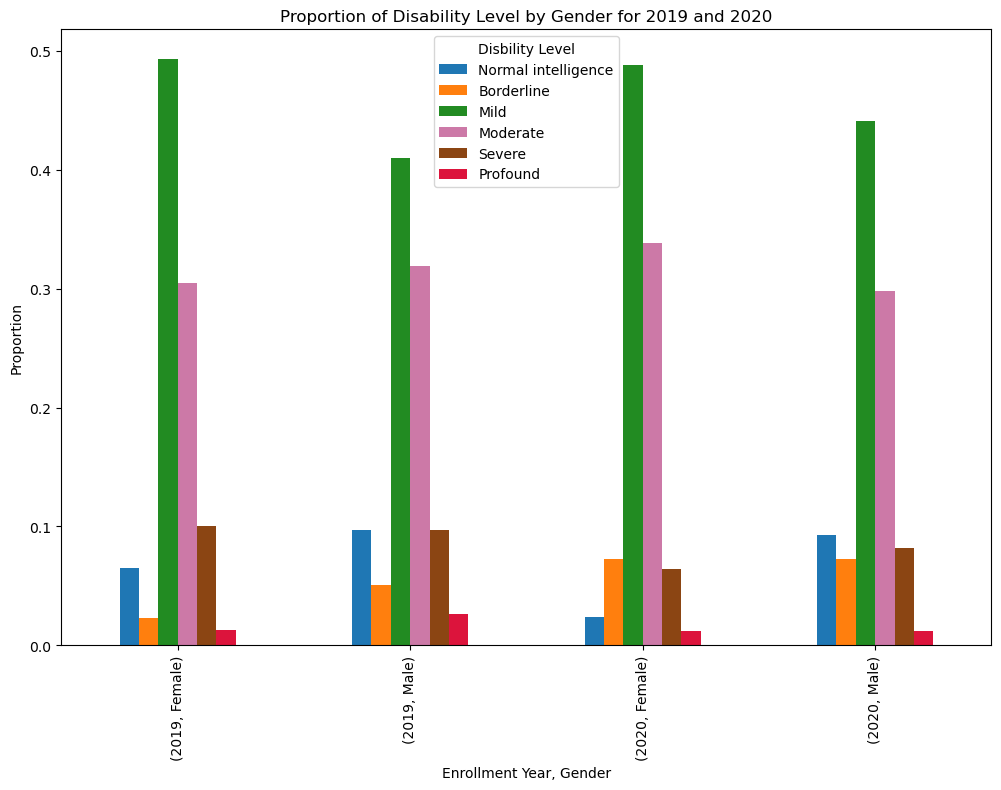

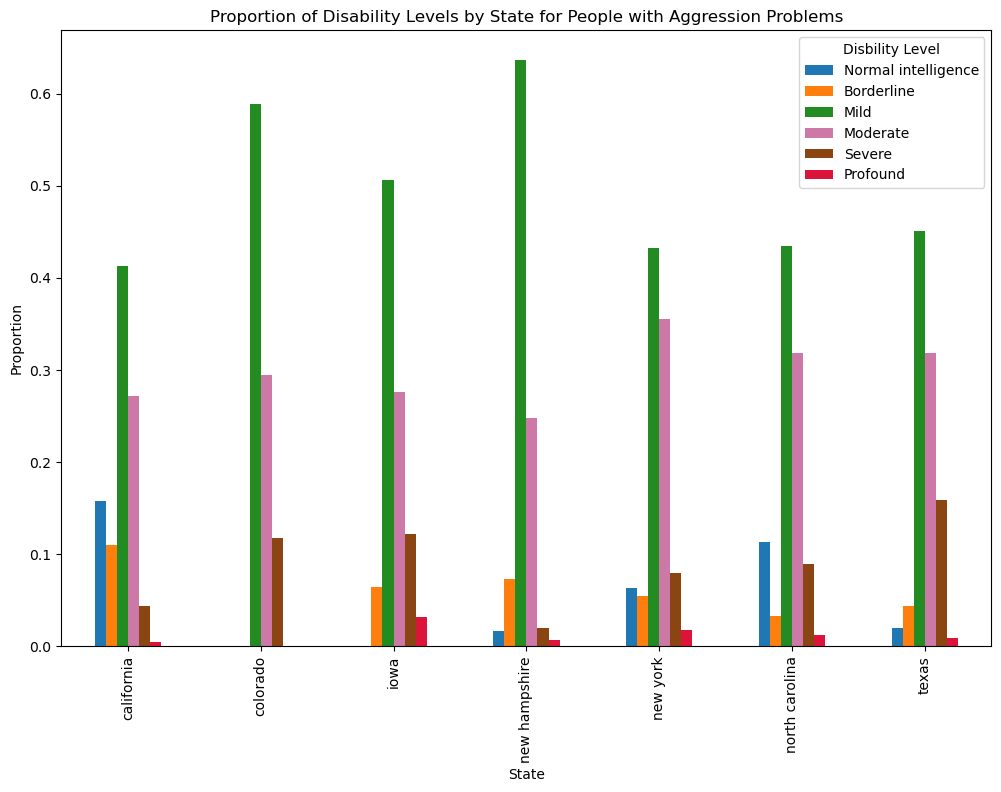

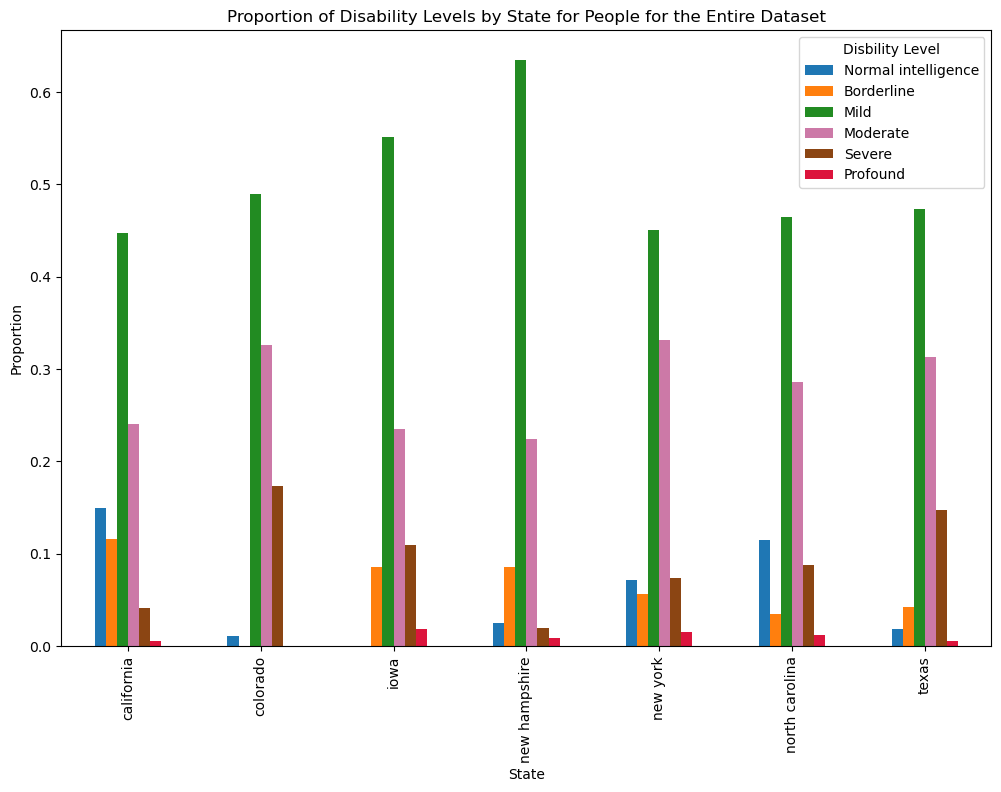

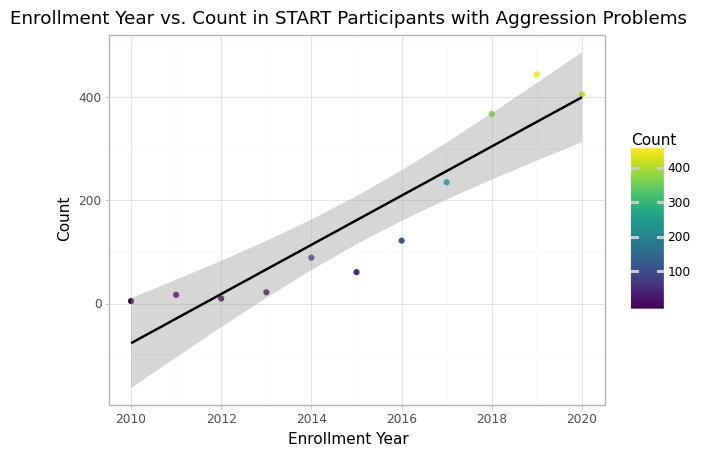

<ggplot: (8774636460240)>

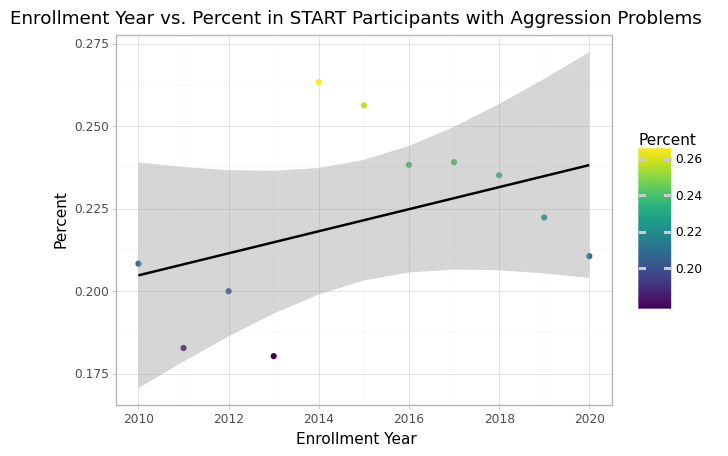

<ggplot: (8774619584470)>

In [24]:
def make_smoothed_plot(df, y_var, y_label):
        return (ggplot(df, aes(x = "enrollment_year", y = y_var, color = y_var))
                + geom_point()
                + geom_smooth(method = "lm")
                + labs(x = 'Enrollment Year', y = y_label, color = y_label,
                       title = "Enrollment Year vs. " + y_label + " in START Participants with Aggression Problems")
                + theme_light()
                + scale_x_continuous(breaks=(2010, 2012, 2014, 2016, 2018, 2020)))
        
make_smoothed_plot(aggression_mild_df, 'Local ID', 'Count')                                                                                                                                                                                                                     
make_smoothed_plot(mild_merged_df, 'mild_perc', 'Percent')

In [25]:
# subsetting to people w/ aggression in New York State
ny_aggression = demographics_aggression_problems[demographics_aggression_problems['state_demographics'] 
                                                 == 'new york'].reset_index().copy()

# verifying subsetting was done correctly
ny_aggression['state_demographics'].value_counts()

# unique counties
ny_aggression.County.nunique()

new york    2049
Name: state_demographics, dtype: int64

45

In [26]:
# subsetting to people in New York State (all presented problems included)
ny_gen_cases = demographics_problems_merged[demographics_problems_merged['state_demographics'] 
                                                 == 'new york'].reset_index().copy()
# verifying subsetting was done correctly
ny_gen_cases['state_demographics'].value_counts()

# unique counties
ny_gen_cases.County.nunique()

new york    8504
Name: state_demographics, dtype: int64

45

In [27]:
# create dataframe with count of people with agression issues in NYS by county
ny_county_agg = pd.DataFrame(ny_aggression.groupby(['County', 'state_demographics']).agg({"index":"count"})).reset_index().copy()

# create dataframe with count of people in NYS by county
ny_county_gen = pd.DataFrame(ny_gen_cases.groupby(['County', 'state_demographics']).agg({"index":"count"})).reset_index().copy()

# creating percentage per county
ny_county_agg['county_perc'] = ny_county_agg['index']/ny_county_gen['index']
ny_county_agg

,County,state_demographics,index,county_perc
0,Albany,new york,41,0.218085
1,Allegany,new york,11,0.171875
2,Bronx,new york,165,0.291519
3,Cattaraugus,new york,17,0.195402
4,Chautauqua,new york,18,0.230769
5,Chemung,new york,25,0.235849
6,Columbia,new york,16,0.228571
7,Delaware,new york,1,0.333333
8,Dutchess,new york,50,0.238095
9,Erie,new york,172,0.238889


In [28]:
# reading in counties shapefile with NYS county shapes
file = '../data/NYS_Civil_Boundaries/Counties.shp'
ny_counties =  gpd.read_file(file)

# dropping columns with all null values
ny_counties = ny_counties.drop(columns=['DOS_LL', 'DOSLL_DATE'])
ny_counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((605729.038 4737866.883, 606008.186 4..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,N,1035.209131,2019-04-26,210499.339692,2.681179e+09,"POLYGON ((229573.870 4712922.870, 229713.780 4..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((595540.679 4528518.902, 595766.658 4..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((428899.262 4696276.376, 428927.641 4..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,N,1324.309219,2019-04-26,276084.505177,3.429945e+09,"POLYGON ((169747.340 4717358.900, 169915.500 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,N,845.855708,2017-11-10,302358.996670,2.190756e+09,"POLYGON ((630545.502 4850934.250, 630568.986 4..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((359224.655 4839585.411, 360415.386 4..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((621529.864 4575208.794, 621514.082 4..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((225124.646 4751746.514, 225132.043 4..."


In [29]:
# changing projection of map
ny_counties.to_crs(epsg=4269, inplace = True)

# verifying ny_counties looks correct
ny_counties.plot()

<AxesSubplot:>

In [30]:
# merging shapefile df and data df to make mapping easier
ny_counties = pd.merge(left=ny_counties, right=ny_county_agg,
                      left_on='NAME', right_on='County',
                      how='left')

In [31]:
ny_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   NAME                62 non-null     object  
 1   ABBREV              62 non-null     object  
 2   GNIS_ID             62 non-null     object  
 3   FIPS_CODE           62 non-null     object  
 4   SWIS                62 non-null     object  
 5   NYSP_ZONE           62 non-null     object  
 6   POP1990             62 non-null     int64   
 7   POP2000             62 non-null     int64   
 8   POP2010             62 non-null     int64   
 9   POP2020             62 non-null     int64   
 10  NYC                 62 non-null     object  
 11  CALC_SQ_MI          62 non-null     float64 
 12  DATEMOD             60 non-null     object  
 13  Shape_Leng          62 non-null     float64 
 14  Shape_Area          62 non-null     float64 
 15  geometry            62 non-null   

<AxesSubplot:>

Text(0.5, 1.0, 'Percent of START Partcipants with Aggression in New York State')

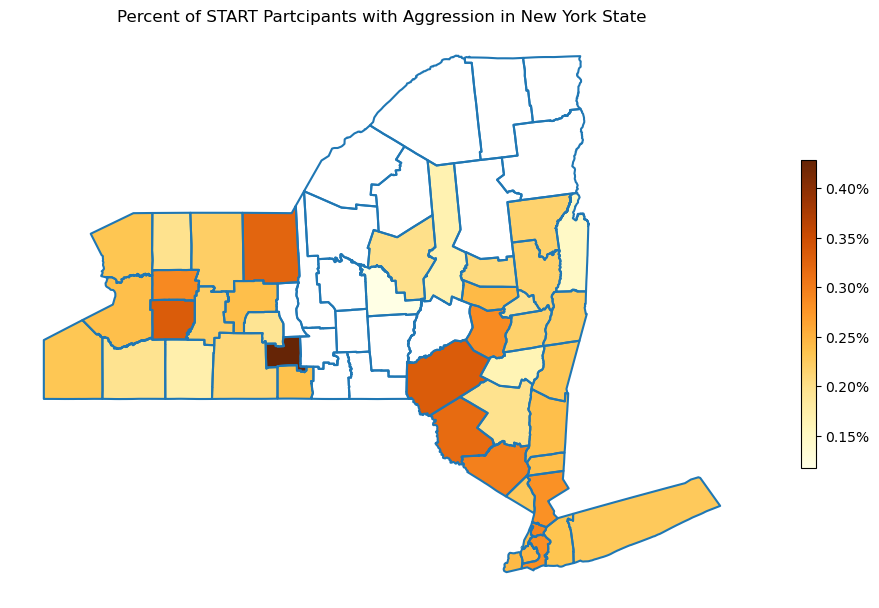

In [44]:
# PLAIN GEOVISUALIZATION WITHOUT INSET MAP
# creating boundary lines for each county
ax = ny_counties.boundary.plot(figsize=(12,8))

# plotting NYS and customizing legend and color
ny_counties.plot(ax=ax, column='county_perc',legend=True, cmap='YlOrBr', 
                 legend_kwds={'shrink':0.5, 'format':'%.2f%%'})

# taking away axis from visualization
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


# taking away edge outline
for edge in ['top', 'bottom', 'right', 'left']:
    ax.spines[edge].set_visible(False)

# establishing title
ax.set_title('Percent of START Partcipants with Aggression in New York State')


# showing the map
plt.show()




<AxesSubplot:>

(-77.1070518004452, -76.61927903930125)

(42.23352580681928, 42.54679269372661)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fb0141b2a30>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fb0141c4d90>)

<AxesHostAxes:>

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Percent of START Partcipants with Aggression in New York State')

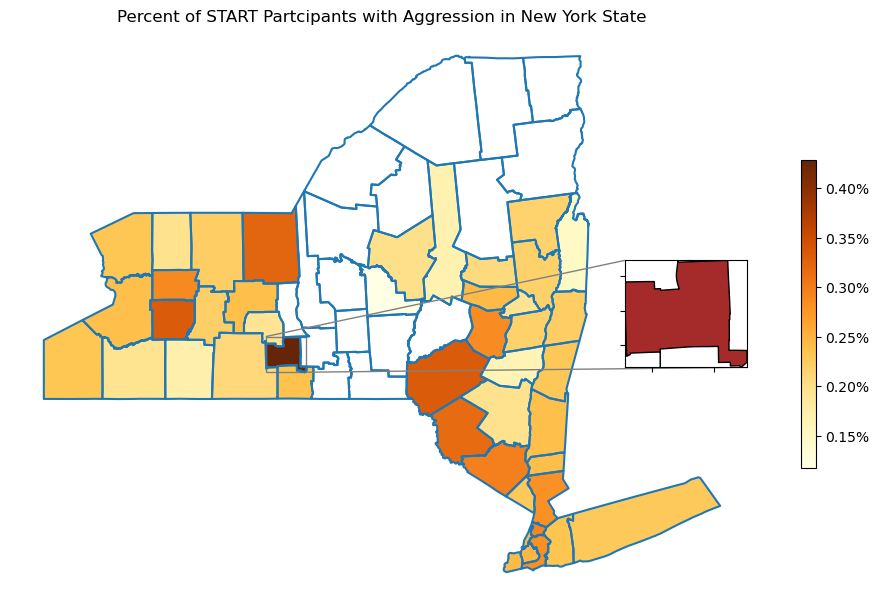

In [48]:
# GEOVISUALIZATION WITH INSET MAP
# creating boundary lines for each county
ax = ny_counties.boundary.plot(figsize=(12,8))

# plotting NYS and customizing legend and color
ny_counties.plot(ax=ax, column='county_perc',legend=True, cmap='YlOrBr', 
                 legend_kwds={'shrink':0.5, 'format':'%.2f%%'})

# created inset map of Brooklyn
# help from: https://jeremysze.github.io/GIS_exploration/build/html/zoomed_inset_axes.html
# and https://github.com/geopandas/geopandas/issues/1114
axins = zoomed_inset_axes(ax, 3, loc=5, axes_kwargs={'fc':'brown'})


minx,miny,maxx,maxy =  ny_counties.query('NAME == "Schuyler"').total_bounds
axins.set_xlim(minx, maxx)
axins.set_ylim(miny, maxy)

# taking away axis from visualization
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

ny_counties.query('NAME != "Schuyler"').plot(ax= axins,edgecolor='black', color='white')

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)

# taking away edge outline
for edge in ['top', 'bottom', 'right', 'left']:
    ax.spines[edge].set_visible(False)

# establishing title
ax.set_title('Percent of START Partcipants with Aggression in New York State')

# showing the map
plt.show()

In [ ]:
temp = pd.DataFrame(demographics_aggression_problems['state_demographics'].value_counts(normalize=True)).reset_index()
temp['index'] = temp['index'].astype('category')
(ggplot(temp, aes(x = 'reorder(index, state_demographics)', y = 'state_demographics', fill = 'state_demographics'))
            + geom_col()
            + coord_flip()
            + scale_fill_gradient(low='blue', high='red')
            + labs(x = 'State', y = 'Proportion')
            + theme_light()
            + theme(legend_position='none'))

In [ ]:
ny_counties.to_pickle('../data/ny_counties.pkl')